# What wine to drink?

This question just gets harder if you realize all the wine brands that exits.
This notebook build an AI to help you to decide.

## Data
Data was taken from [Kaggle](https://www.kaggle.com/yasserh/wine-quality-dataset).

In [23]:
import pandas as pd

data = pd.read_csv('./WineQT.csv', index_col='Id')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


## EDA
Using the Pandas Profiling tool for better EDA.

In [24]:
from pandas_profiling import  ProfileReport

generate_report = False # Enable when needed
if generate_report:
    profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)
    # profile.to_notebook_iframe()
    profile.to_file("wine_report.html")

Or do it yourself with matplotlib & seaborn

Text(0.5, 1.0, 'Correlation Matrix')

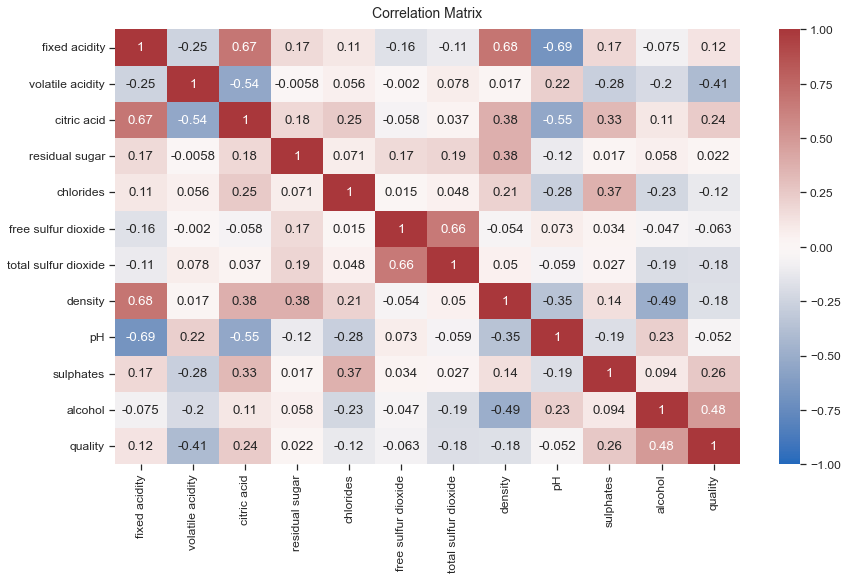

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

plt.figure(figsize=(14, 8))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')
plt.title('Correlation Matrix', fontdict={'fontsize':14}, pad=12)

In [26]:
# Clean up Jupyter Notebook for better performance
# %reset -f

## Data Preperation

### Nomalize the Data

In [27]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
#columns = data.columns # not so good as we cant normalize 'text' column
# interesting_columns =['text_length', 'text_size', 'x', 'y', 'width', 'height', 'area']
raw_feature_columns =['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
                  'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

normalized_columns= ['normalized fixed acidity','normalized volatile acidity','normalized citric acid',
                     'normalized residual sugar','normalized chlorides', 'normalized free sulfur dioxide',
                     'normalized total sulfur dioxide','normalized density','normalized pH',
                     'normalized sulphates','normalized alcohol']
data[normalized_columns] = scale.fit_transform(data[raw_feature_columns])
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,normalized volatile acidity,normalized citric acid,normalized residual sugar,normalized chlorides,normalized free sulfur dioxide,normalized total sulfur dioxide,normalized density,normalized pH,normalized sulphates,normalized alcohol
Id,,,,,,,,,,,,,,,,,,,,,
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,...,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,...,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,...,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,...,-0.118842,-0.703785,-0.171289,-0.231395,1.306316,-0.180503,-0.514707,0.695966,0.541862,0.515741
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,...,0.493785,-0.958109,-0.466421,-0.400719,1.208717,-0.241539,-0.114545,0.695966,0.952843,-0.870937
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,...,0.382399,-0.958109,-0.392638,0.064922,1.599113,-0.058432,-0.951246,0.887542,-0.456235,0.053515


### Set up Train & Test Datasets

In [28]:
def split_data_from_label(dataframe):
    # training_columns = ['normalized fixed acidity','normalized volatile acidity',
    #                     'normalized citric acid', 'normalized residual sugar',
    #                     'normalized chlorides', 'normalized free sulfur dioxide',
    #                     'normalized total sulfur dioxide','normalized density','normalized pH',
    #                     'normalized sulphates','normalized alcohol'
    #     ]
    training_columns = [
        'normalized alcohol',
        'normalized volatile acidity'
    ]
    data_points = dataframe[training_columns]
    labels = dataframe['quality']
    return data_points, labels

In [45]:
from sklearn.model_selection import train_test_split

all_data_points, all_labels = split_data_from_label(data)
x_train, x_test, y_train, y_test = train_test_split(all_data_points, all_labels, test_size=0.2,
                                                    random_state=99, shuffle=True, stratify=all_labels)

In [49]:
print('TRAIN Dataset')
x_train

TRAIN Dataset


,normalized alcohol,normalized volatile acidity
Id,,
103,-1.148272,0.243165
369,1.440193,-1.455483
1262,-0.593601,-0.453002
352,-1.055827,0.744405
284,-0.593601,0.326705
...,...,...
934,0.053515,0.438092
416,1.162857,-0.285922
785,-0.870937,-1.009936


In [48]:
print('TEST Dataset')
x_test

TEST Dataset


,normalized alcohol,normalized volatile acidity
Id,,
1490,1.809974,-1.733949
862,-0.038930,-0.620082
1384,-0.870937,1.245646
197,-0.316266,-1.288402
1046,0.238406,1.384879
...,...,...
1149,1.440193,-1.009936
79,-1.240717,0.521632
648,0.700632,-0.285922


### Get samples of varying sizes
This simulates the model training over increasing dataset sizes.

Note: this might or might be useful depending on the sample cont, so play around with this

In [32]:
def get_samples(sample_x, sample_y, samples_count=5):
    sample_data_packages = []
    for sample_index in range(1, samples_count+1):
        train_size = sample_index / samples_count
        if train_size < 1.0:
            package = train_test_split(sample_x, sample_y, train_size=train_size, random_state=0, shuffle=True, stratify=sample_y)
        else:
            package = [sample_x, None, sample_y, None]

        # get only the train data, which increases with the sample count
        sample_data_packages.append({
            'x': package[0], # train x data
            'y': package[2] # train y data
        })

    return sample_data_packages

In [52]:
samples = get_samples(x_train, y_train, samples_count=5)

for index, sample in enumerate(samples):
    print(f'Training set of sample No. {index}: {sample["x"].shape[0]} data points| {sample["y"].mean()} mean quality')
samples

Training set of sample No. 0: 182 data points| 5.653846153846154 mean quality
Training set of sample No. 1: 365 data points| 5.66027397260274 mean quality
Training set of sample No. 2: 548 data points| 5.656934306569343 mean quality
Training set of sample No. 3: 731 data points| 5.655266757865937 mean quality
Training set of sample No. 4: 914 data points| 5.657549234135668 mean quality


[{'x':       normalized alcohol  normalized volatile acidity
  Id                                                   
  285            -0.593601                     0.326705
  1067            0.423296                    -1.232709
  485            -0.408711                     0.772252
  520            -0.408711                    -1.566869
  497             0.608186                    -1.065629
  ...                  ...                          ...
  1530            0.793077                    -0.508695
  1134            1.255303                    -1.399789
  628            -1.055827                     0.048238
  821             3.289097                    -0.620082
  920             0.053515                    -0.675775
  
  [182 rows x 2 columns],
  'y': Id
  285     5
  1067    7
  485     5
  520     6
  497     5
         ..
  1530    6
  1134    7
  628     6
  821     7
  920     5
  Name: quality, Length: 182, dtype: int64},
 {'x':       normalized alcohol  normalized volatil

### Setup k-Crossfold Validation Sets

In [56]:
from sklearn.model_selection import KFold

k_fold = 5
kf5 = KFold(n_splits=5, shuffle=False)

for sample in samples:

    sample_data = sample['x']
    sample_labels = sample['y']
    fold_training = []
    fold_testing = []

    for train_index, test_index in kf5.split(sample_data, sample_labels):
        fold_training.append((sample_data.iloc[train_index],sample_labels.iloc[train_index]))
        fold_testing.append((sample_data.iloc[test_index], sample_labels.iloc[test_index]))

    sample['fold_trains'] = fold_training
    sample['fold_tests'] = fold_testing

## Training & Models

### Models Setup

The following functions return a new and untrained model

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

max_tree_depth = 3

def random_forest():
    return RandomForestClassifier( random_state=0, max_depth=max_tree_depth)

def adaboost():
    return AdaBoostClassifier(n_estimators=100, random_state=0)

def decision_trees():
    return DecisionTreeClassifier(random_state=0, max_depth=max_tree_depth)

def support_vector_maschine():
    return SVC(gamma='auto')

def naive_bayes():
    return CategoricalNB()

def neural_network_50_50_50():
    return MLPClassifier(random_state=3, max_iter=30, solver='lbfgs',
                         hidden_layer_sizes=(50,50,50), alpha=0
                         )
def neural_network_30_30_30():
    return MLPClassifier(random_state=3, max_iter=30, solver='lbfgs',
                         hidden_layer_sizes=(30,30,30), alpha=0
                         )

def neural_network():
    return MLPClassifier(random_state=3, max_iter=30, solver='lbfgs',
                         hidden_layer_sizes=(100), alpha=0
                         )

### Training

In [57]:

def train_and_score_crossfolds(model_creation_function, training_data, testing_data):

    sum_training_error = 0
    sum_test_error = 0

    for fold_index in range(0, k_fold):

        new_blank_model = model_creation_function()

        train_data, train_label = training_data[fold_index]
        test_data, test_label = testing_data[fold_index]

        new_blank_model.fit(train_data, train_label)
        training_score = new_blank_model.score(train_data, train_label)
        testing_score = new_blank_model.score(test_data, test_label)

        sum_training_error = sum_training_error +  training_score
        sum_test_error = sum_test_error + testing_score

    average_training_error = sum_training_error / k_fold
    average_test_error = sum_test_error / k_fold

    return average_training_error, average_test_error

In [58]:
models = [
    # Ensemble
    ('Random Forrest', random_forest),
    ('Ada Boosting', adaboost),
    # Tree
    ('Decision Trees', decision_trees),
    # Support Vectors
    ('Support Vector Maschine', support_vector_maschine),
    # Neural Network -> Multiplayer Perceptron
    ('Neural Network', neural_network),
    ('Neural Network 50 50 50', neural_network_50_50_50),
    ('Neural Network 30 30 30', neural_network_30_30_30),
]

training_results = []

for model_info in models:

    train_scores = []
    test_scores = []

    model_function = model_info[1] # Get function that returns a new and untrained model

    for sample in samples:
        training = sample['fold_trains']
        testing = sample['fold_tests']

        training_accuracy, test_accuracy = train_and_score_crossfolds(model_function, training, testing)

        train_scores.append(training_accuracy)
        test_scores.append(test_accuracy)

    training_results.append([train_scores, test_scores])

/Users/asgard/Coding/drink_wine/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/asgard/Coding/drink_wine/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/asgard/Coding/drink_wine/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWa

## Plot the Training results

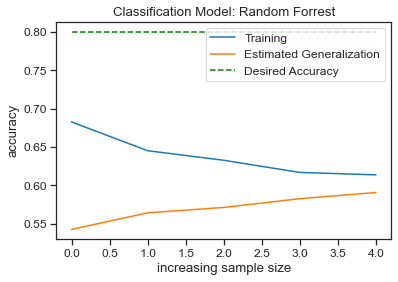

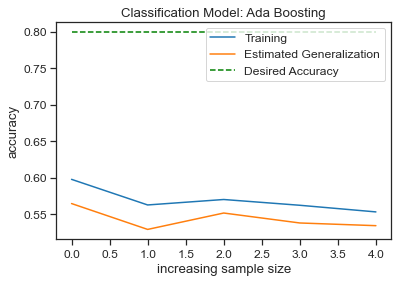

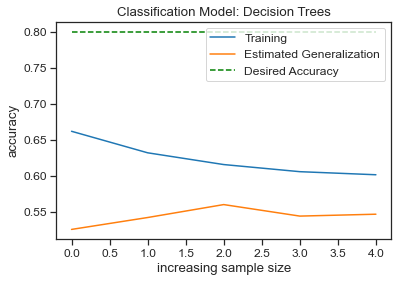

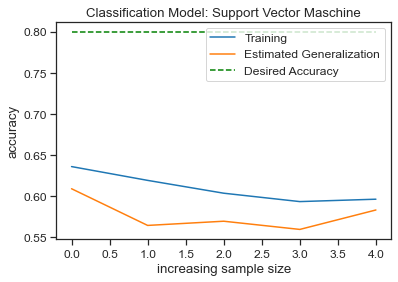

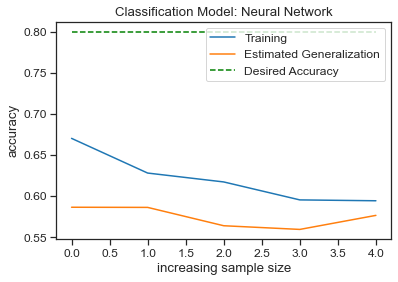

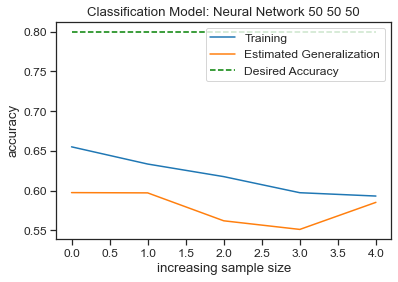

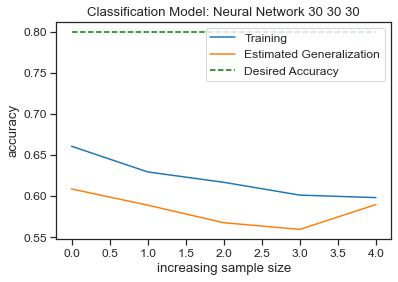

In [59]:
for index, model_info in enumerate(models):
    model_name = model_info[0]
    training_phase_scores = training_results[index]
    train_points = training_phase_scores[0]
    test_points = training_phase_scores[1]

    # print(f'Model {model_name}: Training accuracy:{results[index][0]}    estimated Generalization accuracy: {results[index][1]}')

    # plot the graph
    figure, axes = plt.subplots()
    x_min = 0
    x_max = len(samples)
    x = range(x_min, x_max)
    axes.plot(x, train_points, label='Training')
    axes.plot(x, test_points, label='Estimated Generalization')
    axes.hlines(y=0.8, xmin=x_min, xmax=x_max-1, label='Desired Accuracy', linestyle='--', colors='g')
    axes.set_xlabel('increasing sample size')
    axes.set_ylabel('accuracy')
    axes.legend()
    axes.set_title(f'Classification Model: {model_name}')

## Testing the model
For this we retain on the full training dataset

### Training

In [60]:
from sklearn.metrics import confusion_matrix

testing_results = []

for model_info in models:

    model_name = model_info[0]
    create_model_function = model_info[1]
    model = create_model_function()
    model.fit(x_train, y_train)

    training_accuracy = model.score(x_train, y_train)
    generalization_accuracy = model.score(x_test, y_test)

    print(f'Model {model_name}: Training accuracy: {training_accuracy}    Generalization accuracy: {generalization_accuracy}')

    confusion_training = confusion_matrix(y_train,  model.predict(x_train))
    confusion_testing = confusion_matrix(y_true=y_test, y_pred=model.predict(x_test))

    testing_results.append([training_accuracy, generalization_accuracy, confusion_training, confusion_testing])

Model Random Forrest: Training accuracy: 0.6105032822757112    Generalization accuracy: 0.611353711790393
Model Ada Boosting: Training accuracy: 0.5448577680525164    Generalization accuracy: 0.5545851528384279
Model Decision Trees: Training accuracy: 0.6039387308533917    Generalization accuracy: 0.6026200873362445
Model Support Vector Maschine: Training accuracy: 0.5962800875273523    Generalization accuracy: 0.5895196506550219


/Users/asgard/Coding/drink_wine/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Neural Network: Training accuracy: 0.5919037199124726    Generalization accuracy: 0.6069868995633187


/Users/asgard/Coding/drink_wine/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Neural Network 50 50 50: Training accuracy: 0.5929978118161926    Generalization accuracy: 0.5851528384279476
Model Neural Network 30 30 30: Training accuracy: 0.5951859956236324    Generalization accuracy: 0.611353711790393


/Users/asgard/Coding/drink_wine/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Plotting

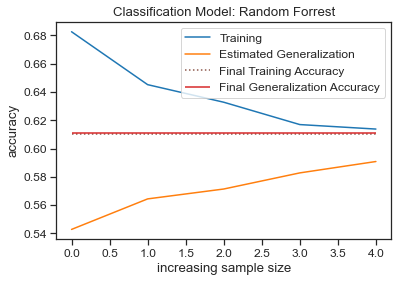

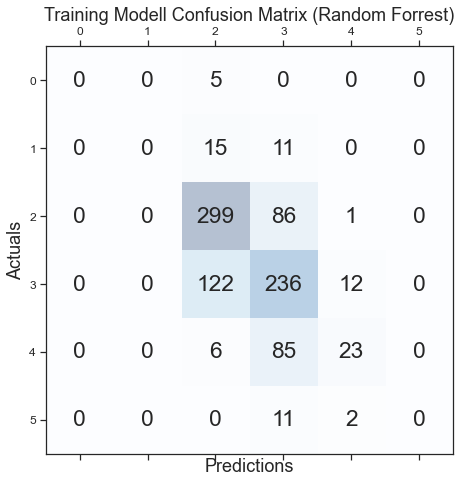

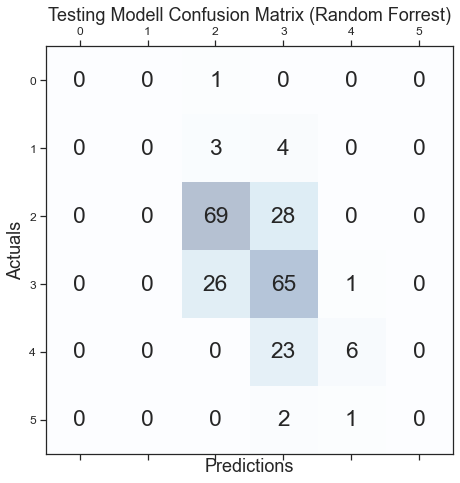

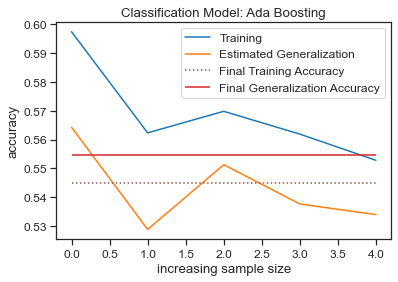

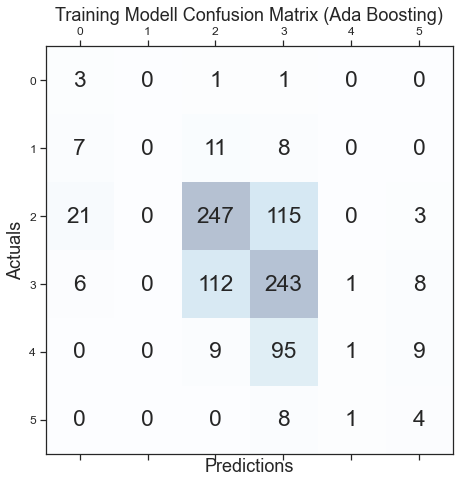

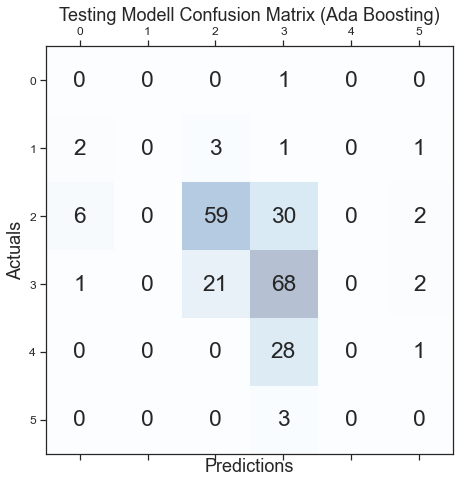

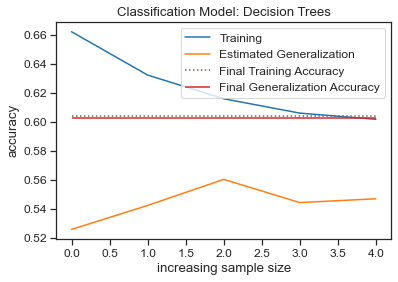

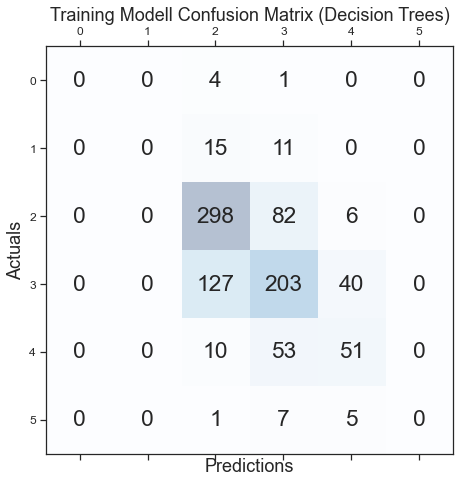

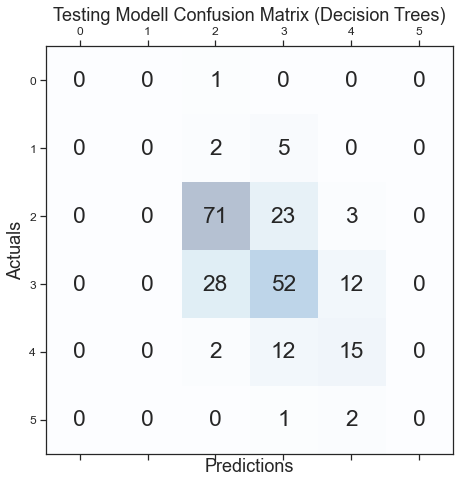

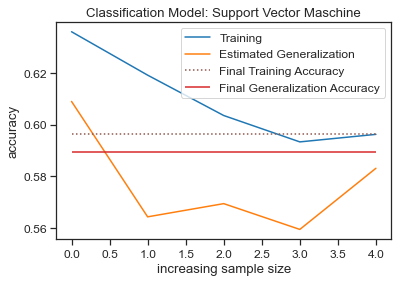

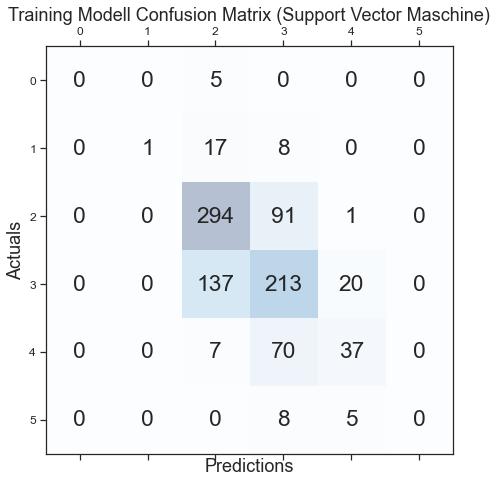

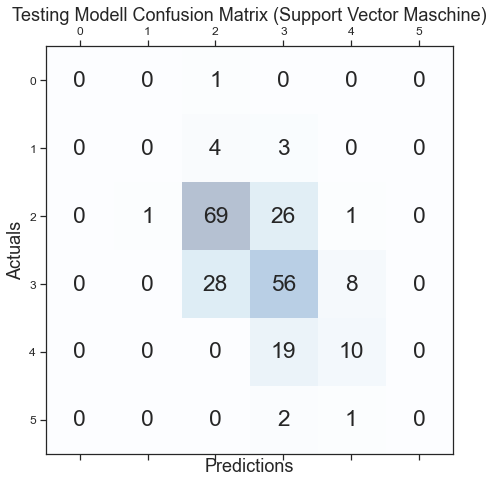

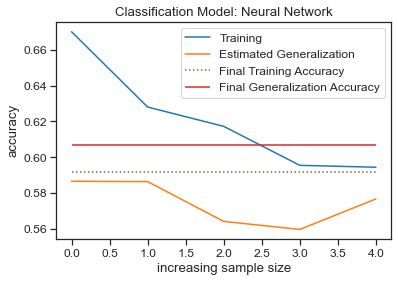

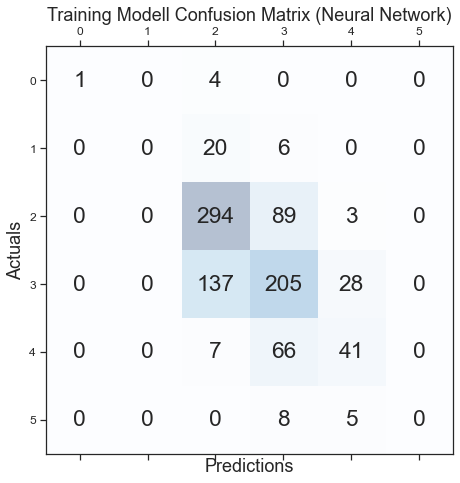

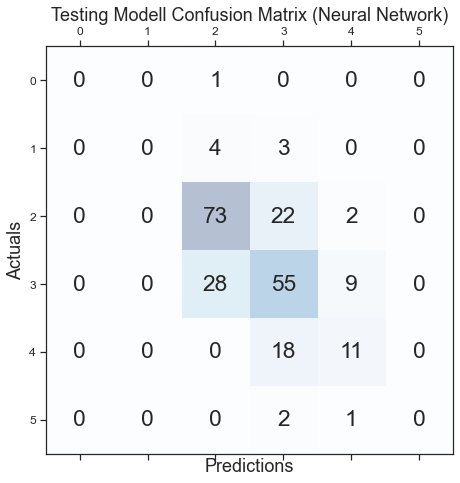

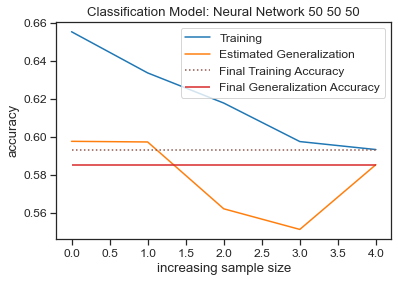

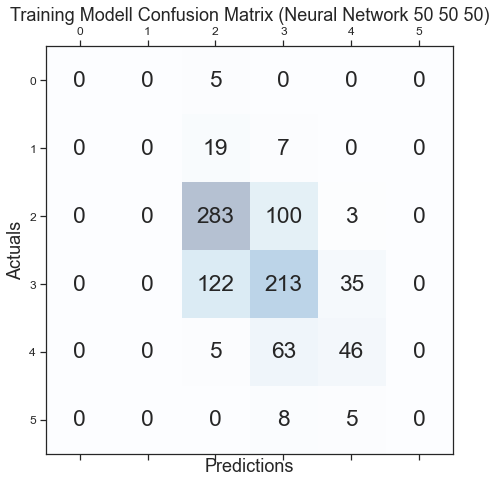

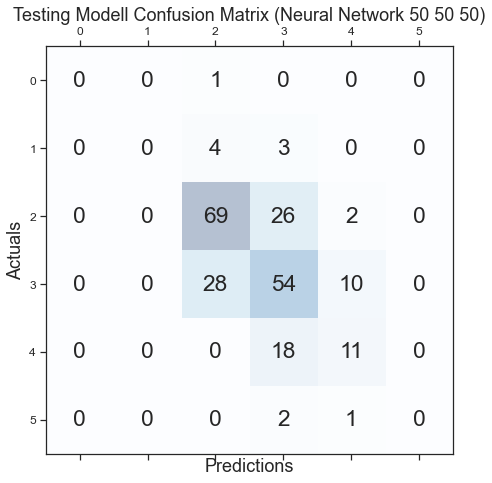

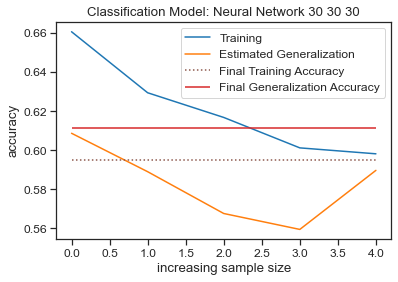

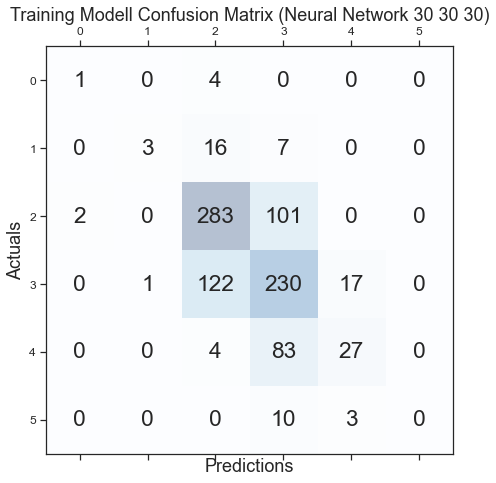

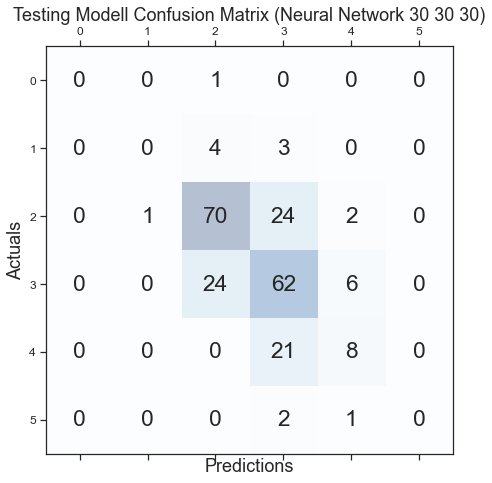

In [61]:
for index, model_info in enumerate(models):
        model_name = model_info[0]
        training_phase_scores = training_results[index]
        train_points = training_phase_scores[0]
        test_points = training_phase_scores[1]


        testing_phase_scores = testing_results[index]
        training_result = testing_phase_scores[0]
        generalization_result = testing_phase_scores[1]
        training_confusion_matrix = testing_phase_scores[2]
        testing_confusion_matrix = testing_phase_scores[3]

        # plot the graph
        figure, axes = plt.subplots()
        x_min = 0
        x_max = len(samples)
        x = range(x_min, x_max)
        axes.plot(x, train_points, label='Training', color='tab:blue')
        axes.plot(x, test_points, label='Estimated Generalization', color='tab:orange')
        # axes.hlines(y=0.8, xmin=x_min, xmax=x_max-1, label='Desired Accuracy', linestyle='--', colors='tab:green')
        axes.hlines(y=training_result, xmin=x_min, xmax=x_max-1, label='Final Training Accuracy', linestyle='dotted', colors='tab:brown')
        axes.hlines(y=generalization_result, xmin=x_min, xmax=x_max-1, label='Final Generalization Accuracy', colors='tab:red')
        axes.set_xlabel('increasing sample size')
        axes.set_ylabel('accuracy')
        axes.legend()
        axes.set_title(f'Classification Model: {model_name}')


        fig, ax = plt.subplots(figsize=(7.5, 7.5))
        ax.matshow(training_confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
        for i in range(training_confusion_matrix.shape[0]):
            for j in range(training_confusion_matrix.shape[1]):
                ax.text(x=j, y=i,s=training_confusion_matrix[i, j], va='center', ha='center', size='xx-large')

        plt.xlabel('Predictions', fontsize=18)
        plt.ylabel('Actuals', fontsize=18)
        plt.title(f'Training Modell Confusion Matrix ({model_name})', fontsize=18)
        plt.show()

        fig, ax = plt.subplots(figsize=(7.5, 7.5))
        ax.matshow(testing_confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
        for i in range(testing_confusion_matrix.shape[0]):
            for j in range(testing_confusion_matrix.shape[1]):
                ax.text(x=j, y=i,s=testing_confusion_matrix[i, j], va='center', ha='center', size='xx-large')

        plt.xlabel('Predictions', fontsize=18)
        plt.ylabel('Actuals', fontsize=18)
        plt.title(f'Testing Modell Confusion Matrix ({model_name})', fontsize=18)
        plt.show()